In [22]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE
import pickle

In [2]:
df = pd.read_csv('framingham.csv')
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [4]:
df.rename(columns = {'male': 'sex'}, inplace = True)
df.head()

,sex,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [6]:
features = ['sex', 'age', 'cigsPerDay', 'totChol', 'sysBP', 'glucose']
target = 'TenYearCHD'
df = df[features + [target]]
df.head() #Final Dataset

,sex,age,cigsPerDay,totChol,sysBP,glucose,TenYearCHD
0,1,39,0.0,195.0,106.0,77.0,0
1,0,46,0.0,250.0,121.0,76.0,0
2,1,48,20.0,245.0,127.5,70.0,0
3,0,61,30.0,225.0,150.0,103.0,1
4,0,46,23.0,285.0,130.0,85.0,0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   sex         4240 non-null   int64  
 1   age         4240 non-null   int64  
 2   cigsPerDay  4211 non-null   float64
 3   totChol     4190 non-null   float64
 4   sysBP       4240 non-null   float64
 5   glucose     3852 non-null   float64
 6   TenYearCHD  4240 non-null   int64  
dtypes: float64(4), int64(3)
memory usage: 232.0 KB


In [10]:
df.isnull().sum()


sex             0
age             0
cigsPerDay     29
totChol        50
sysBP           0
glucose       388
TenYearCHD      0
dtype: int64

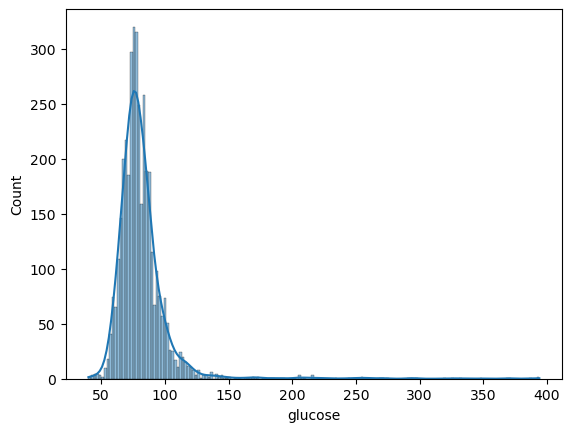

Skewness: 6.2149483495346765


In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.histplot(df['glucose'].dropna(), kde=True)
plt.show()
print("Skewness:", df['glucose'].skew())

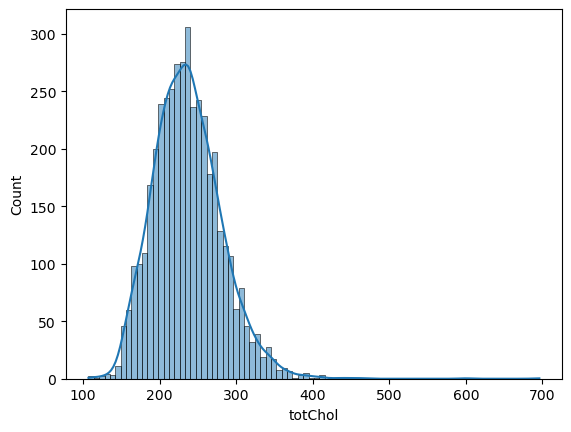

Skewness: 0.8718805634765354


In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.histplot(df['totChol'].dropna(), kde=True)
plt.show()
print("Skewness:", df['totChol'].skew())

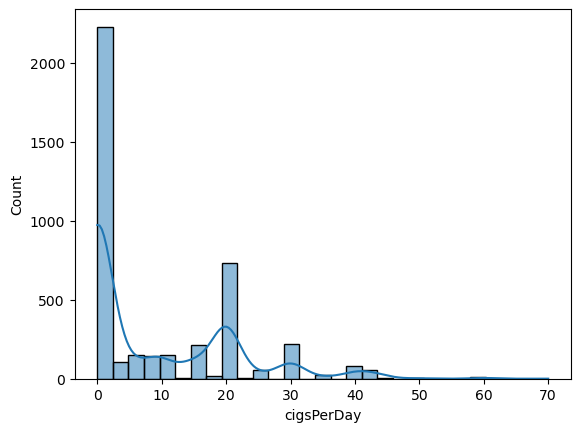

Skewness: 1.2470523561848126


In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.histplot(df['cigsPerDay'].dropna(), kde=True)
plt.show()
print("Skewness:", df['cigsPerDay'].skew())

In [14]:
df['cigsPerDay'].fillna(df['cigsPerDay'].median(), inplace=True)
df['totChol'].fillna(df['totChol'].median(), inplace=True)
df['glucose'].fillna(df['glucose'].median(), inplace=True)
df.isnull().sum()

C:\Users\adity\AppData\Local\Temp\ipykernel_15400\633524483.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['cigsPerDay'].fillna(df['cigsPerDay'].median(), inplace=True)
C:\Users\adity\AppData\Local\Temp\ipykernel_15400\633524483.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a 

sex           0
age           0
cigsPerDay    0
totChol       0
sysBP         0
glucose       0
TenYearCHD    0
dtype: int64

In [15]:
X = df[features]
y = df[target]

C:\Users\adity\AppData\Local\Temp\ipykernel_15400\2540950395.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='TenYearCHD', data=df, palette='BuGn_r')


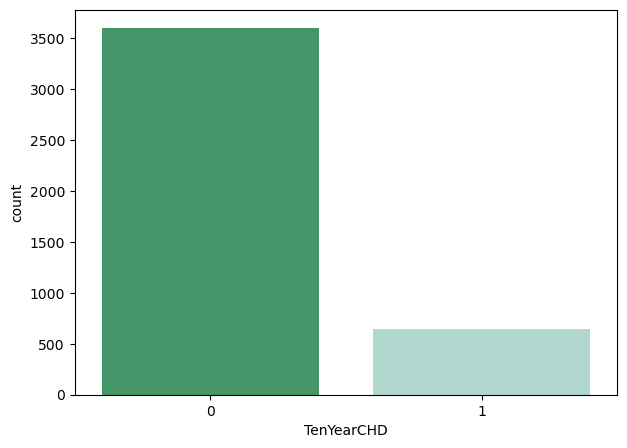

In [16]:
plt.figure(figsize=(7, 5))
sns.countplot(x='TenYearCHD', data=df, palette='BuGn_r')
plt.show()

In [17]:
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

In [19]:
X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled, test_size=0.2, random_state=42)


In [25]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [26]:
y_pred = rf.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.88      0.84      0.86       745
           1       0.84      0.88      0.86       694

    accuracy                           0.86      1439
   macro avg       0.86      0.86      0.86      1439
weighted avg       0.86      0.86      0.86      1439



In [27]:
with open('random_forest_chd.pkl', 'wb') as file:
    pickle.dump(rf, file)

print("✅ Model saved as 'random_forest_chd.pkl'")

✅ Model saved as 'random_forest_chd.pkl'
